# Divactory01 Warm-Up Case

Through this notebook, we will do data exploration and modelling on the warm-up case dataset. 

## Data Exploration

First, we load both the training and testing dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
train = pd.read_csv("train.csv")
train.head()

,peubah1,peubah2,peubah3,peubah4,peubah5,peubah6,peubah7,peubah8,peubah9,peubah10,...,peubah13,peubah14,peubah15,peubah16,peubah17,peubah18,peubah19,peubah20,peubah21,target
0,0.416471,0.433618,0.480263,0.391386,0.312282,0.350107,0.479583,0.366904,0.297115,0.407623,...,0.346316,0.519490,0.462123,0.351881,0.454687,0.480554,0.441771,0.381719,0.360698,1
1,0.393217,0.461127,0.453290,0.404972,0.376990,0.392576,0.406791,0.408893,0.255766,0.491208,...,0.358346,0.479205,0.447285,0.335229,0.445615,0.451973,0.421719,0.376270,0.305129,0
2,0.411785,0.463772,0.417967,0.454509,0.415468,0.418473,0.335786,0.397057,0.359163,0.497376,...,0.396283,0.412580,0.368068,0.388834,0.415171,0.412811,0.359205,0.373100,0.299415,0
3,0.416128,0.434078,0.483265,0.357681,0.308477,0.342319,0.500872,0.375741,0.270538,0.421817,...,0.339275,0.538065,0.476383,0.341957,0.457817,0.490621,0.454611,0.392002,0.369631,1
4,0.431211,0.460969,0.418770,0.449622,0.409211,0.449635,0.370591,0.372039,0.324457,0.457634,...,0.404351,0.423462,0.393851,0.387756,0.408308,0.411725,0.390778,0.366613,0.321540,1


In [3]:
test = pd.read_csv("test.csv")
test.head()

,peubah1,peubah2,peubah3,peubah4,peubah5,peubah6,peubah7,peubah8,peubah9,peubah10,...,peubah12,peubah13,peubah14,peubah15,peubah16,peubah17,peubah18,peubah19,peubah20,peubah21
0,0.400607,0.443769,0.464715,0.375981,0.347645,0.351663,0.439126,0.407550,0.284675,0.468440,...,0.396014,0.347674,0.497309,0.432114,0.348655,0.451305,0.472033,0.405878,0.398407,0.343448
1,0.470947,0.441900,0.405045,0.428465,0.408474,0.422047,0.408461,0.336708,0.354572,0.422165,...,0.424954,0.424889,0.427246,0.390927,0.409563,0.387016,0.405265,0.413499,0.370956,0.363065
2,0.441025,0.323778,0.483907,0.308521,0.314570,0.207949,0.467782,0.373190,0.422067,0.372418,...,0.332952,0.344235,0.491037,0.382517,0.352015,0.459764,0.496396,0.429787,0.452151,0.460401
3,0.426437,0.551134,0.387668,0.490480,0.428146,0.439100,0.392839,0.372694,0.217657,0.538328,...,0.508479,0.417967,0.457096,0.471172,0.392866,0.384602,0.383376,0.418434,0.289186,0.192858
4,0.449629,0.343292,0.415963,0.387159,0.421161,0.380797,0.297999,0.399226,0.492932,0.408906,...,0.373279,0.408746,0.336479,0.199777,0.423220,0.409391,0.422925,0.274012,0.470941,0.453442


As we can observe from the snippets of the training data, it contains 21 columns of data variable (from peubah1 until peubah21) and one label named target. As for the test data, it only contains 21 data variable. The task of the case is  to create a model to predict the target on the test set with the objectives to minimize the negatlive log loss.

In [4]:
# Let's do some preliminary statistics and check the number of class
nb_class = train['target'].unique()
print "class:", nb_class
len_train = len(train)
len_test = len(test)
print "# of train data:", len_train
print "# of test data:", len_test

class: [1 0]
# of train data: 21681
# of test data: 86724


There are only two labels in the target column, 0 and 1. So we can conclude that the task is actually a **binary classification task**. In binary classification task, it is quite important to understand whether the data is imbalanced or not, since it may influence the data processing pipeline that we employ later. We also note that the test data consists exactly four times larger than the training data.

In [5]:
# There are two unique values. Let's filter them out to see number of positive and negative class
pos_label = len(train[train['target'] == 1])
neg_label = len(train[train['target'] == 0])
print "negative label:", neg_label, "positive label:", pos_label

negative label: 10756 positive label: 10925


Since both the negative and positive label is comparable to each other, we can conclude that this is a **balanced dataset**. We to check whether different features have different range of values or not. This is particularly important because some methods or classifiers that are out there are not scale-invariant. So by understanding that our dataset has different range of features values or not will help us to build a better model later.

In [6]:
train_mean = train.mean()
train_std = train.std()
train_max = train.std()
train_std = train.std()

train_stats = pd.DataFrame(train_mean, columns=['mean'])
train_stats['std'] = train_std
train_stats

,mean,std
peubah1,0.404051,0.060557
peubah2,0.428532,0.067654
peubah3,0.463884,0.062233
peubah4,0.378452,0.066273
peubah5,0.355536,0.061575
peubah6,0.403251,0.069431
peubah7,0.426134,0.064682
peubah8,0.393310,0.059387
peubah9,0.288719,0.072648
peubah10,0.446128,0.062610


Well, it seems the data is scaled nicely. So we don't need any strategy to rescale our dataset.

Up until now, we already have a basic understanding of the behaviour of our dataset : **two-class, balanced, **and** homogeneous in scale**.

Next thing that we want to observe is that how the instances from both class are distributed. Since the data consists of 21 features, it's quite difficult to create a visualization directly from it. PCA will help us transform the dataset to lower dimension that will make it easier for us to visualize. In order to do that, we will check the the first three PCA components of the whole dataset.

In [7]:
from sklearn.decomposition import PCA

train_data = train.drop('target', 1).values
train_label = train['target'].values

test_data = test.values

pca = PCA(n_components=3)
pca_train = pca.fit(train_data).transform(train_data)
pca_test = pca.transform(test_data)
print sum(pca.explained_variance_ratio_)

0.954418474545


It's quite nice that only from the first 3 components, we have already covered **95%** variances from the data. So, now let's plot it!

<IPython.core.display.Javascript object>


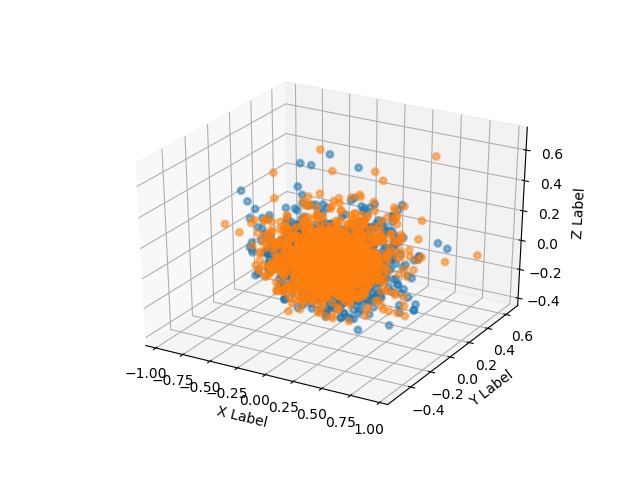

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import resample

lw = 2
target_names = [0, 1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Here, we resample by 3000 so that we can explore the graph in a more fluid way. 
# Change it to higher number if you want.
X_res, y_res = resample(pca_train, train_label, n_samples=3000)

for i, target_name in zip(target_names, target_names):
    ax.scatter(X_res[y_res == i, 0], X_res[y_res == i, 1],
               X_res[y_res == i, 2], alpha=.5, lw=lw, label=target_name)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


Well, it seems that both class is not linearly separable for sure. In fact, based on the PCA representation, we think it will be quite challenging later to get a high classification accuracy. Nevertheless, by observing the data visually, it will really help to get a prior understanding of the data and also prior expectation of the performance of our classifier later.

Another important property that we need to take a look is that whether the test data is also drawn from the same distribution or not. While statistical check might measure that, we choose a simpler option. Let's just visualize both the training and test data in one figure.

<IPython.core.display.Javascript object>


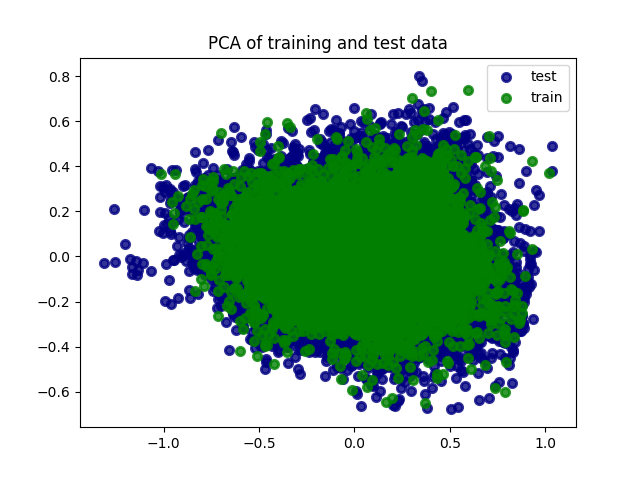

In [9]:
plt.figure()
lw = 2

plt.scatter(pca_test[:,0], pca_test[:, 1],
            color='navy', alpha=.8, lw=lw,
            label='test')
# We can comment the part of the test or train data to see it more clearly that the dataset seems to come from the same distribution.
plt.scatter(pca_train[:,0], pca_train[:, 1],
            color='green', alpha=.8, lw=lw,
            label='train')

plt.title('PCA of training and test data')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

Based on visual observation, it seems that the test data is indeed coming from the same distribution as the training dataset.

## Normality Check

Somehow, we have a strong belief that the dataset is artificial, in a sense that it is drawn from a normal distribution with a pre-defined mean and standard deviation. In order to check whether our assumption is correct, we will do a test on normality check. There are quite a number of tests available, but for this case, we will use Shapiro normality check.



In [10]:
# ref : http://www.itl.nist.gov/div898/handbook/prc/section2/prc213.htm
from scipy import stats

print stats.shapiro(train_data)
print stats.shapiro(test_data)

# it seems that the data is perfectly normal
# can we do MLE to obtain on which parameter the samples is generated?

/Users/rezapermadi/anaconda/lib/python2.7/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9939958453178406, 0.0)
(0.9935767650604248, 0.0)


With low p-value and high-value of W from the test-statistic result of shapiro test, our strong assumption might be correct that the data comes from a normal distribution. We can actually do Maximum Likelihood Estimation (MLE) to find the man and variance of the dataset, but we will not do it here.

We are also curious to check some descriptive statistics from the train and test dataset. So let's find the mean and standard deviation from the instances across the sets.

In [11]:
# now let's check the mean and standard deviation from both class
print "mean of class 0:",np.mean(train_data[train_label == 0]),"std of class 0:",np.std(train_data[train_label == 0]) 
print "mean of class 1:",np.mean(train_data[train_label == 1]),"std of class 1:",np.std(train_data[train_label == 1]) 
print "mean of test set:",np.mean(test_data),"std of class 1:",np.std(test_data) 

mean of class 0: 0.400900425663 std of class 0: 0.0799876685342
mean of class 1: 0.400633145743 std of class 1: 0.0800733908424
mean of test set: 0.400723747445 std of class 1: 0.0800277652435


Well, from this result, we are suspicious that the dataset is actually artificial, normal, and the class is just randomly distributed! In this case, we might as well believe that the best classification accuracy will probably lies in between 50%.

## Data Modelling

Now that we are finished with our data exploration, we will move further into data modelling. There are tons of possible ways to create a model, but we will start from exploring some basic classifier, that later will turn out to be quite robust and good. 

Normally, another thing that we need to do is whether we need to create a derived feature, or another feature pre-processing. But since the dataset behaves nicely (scaled and balanced), we don't need to do that. So we can already use a GridSearchCV function from sklearn to evaluate our model in just a single line. Moreover, we use a 10-fold cross validation here.

First, we start with logistic regression. Logistic regression has one hyper-parameter that we can optimize, the C. We want to find the C value that will minimize the negative log loss.

In [12]:
# Gaussian dataset? Hmm.. 
from sklearn.model_selection import cross_val_score
#from xgboost import XGBClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

tuned_parameters = [{'C': np.logspace(-5,5,11)}]

clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=10, scoring='neg_log_loss')
clf.fit(train_data, train_label)
print "Best parameters set found on development set:", clf.best_params_
print "Best negative log_loss score: ", clf.best_score_

# Using logistic regression, the best C = 1000

Best parameters set found on development set: {'C': 1000.0}
Best negative log_loss score:  -0.692131714384


In [32]:
# Let's tune a bit from 1000 to 5000
tuned_parameters = [{'C': [1000, 2000, 3000, 4000, 5000]}]

clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=10, scoring='neg_log_loss')
clf.fit(train_data, train_label)
print "Best parameters set found on development set:", clf.best_params_
print "Best negative log_loss score: ", clf.best_score_

Best parameters set found on development set: {'C': 1000}
Best negative log_loss score:  -0.692129409641


Well, it turns out that using C=1000 already yield a nice log_loss score of **0.6921**.

Since we have a strong prior belief that the dataset comes from a normal distribution, let's see whether Gaussian Naive Bayes Classifier will yield a good result or not.

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

print np.mean(cross_val_score(gnb, train_data, train_label, cv=10, scoring='neg_log_loss'))

-0.717659712101


Naive Bayes classifier only yields **0.7176** of log loss. Logistic regression still performs better here.

Another popular classifier that is quite robust is **Support Vector Machine**. SVM has customizable kernel with quite a few hyperparameters that can capture nonlinearity. Usually we use RBF and polynomial kernel in such nonlinear case. But one drawback of SVM is that it is prone to high computational cost with a lot of training data. Because we have a prior belief that our dataset is normal, we can actually resample from our dataset to create the classifier. In that case, we can train our SVM model with less training data. 

First, let's try RBF kernel with varying number of C and gamma.

In [17]:
# let's try rbf svm with random undersampling
# do cross validation

from sklearn.model_selection import KFold, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import log_loss
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.utils import resample
from sklearn.svm import SVC

# apply resampling to optimize SVM
X_res, y_res = resample(train_data, train_label, n_samples=2000)

# do a gridsearch to find best params
tuned_parameters = [{'kernel': ['rbf'], 'C': [1,10,100,1000], 
                     'gamma':[1, 0.1, 0.01, 0.001]}]    
clf = GridSearchCV(SVC(probability=True), tuned_parameters, cv=10, scoring='neg_log_loss',
                  verbose=1)
clf.fit(X_res, y_res)
print "Best parameters set found on development set:", clf.best_params_
print "Best negative log_loss score: ", clf.best_score_

# even only with 100 samples, the log loss is already good
# but how can we guarantee the performance?

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  3.1min finished


Best parameters set found on development set: {'kernel': 'rbf', 'C': 1000, 'gamma': 1}
Best negative log_loss score:  -0.691793853048


Using RBF kernel and tested on resampled size of the dataset, we can get lower log loss, **0.6918** with C=1000 and gamma=1. However, we have to note that this log loss is produced from resampled dataset. The actual log loss might be bigger than that. In fact, as we increase the values of n_samples, we will get higher log loss. But let's check whether if we use this model in a real cross validation setting, we can still get good result or not.

In [45]:
# let's try rbf svm with random undersampling
# do cross validation

from sklearn.model_selection import KFold, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import log_loss
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct, NormalizedKernelMixin
from sklearn.utils import resample
from sklearn.svm import SVC

skf = StratifiedKFold(n_splits=10)
all_loss = []

for train_idx, test_idx in skf.split(train_data, train_label):
    cv_data_train = train_data[train_idx]
    cv_data_test = train_data[test_idx]
    cv_label_train = train_label[train_idx]
    cv_label_test = train_label[test_idx]
    
    # apply rus
    X_res, y_res = resample(cv_data_train, cv_label_train, n_samples=2000)
    
    clf = SVC(kernel='rbf', probability=True, C=1000, gamma=1)
    clf.fit(X_res, y_res)
    score = log_loss(cv_label_test, clf.predict_proba(cv_data_test))
    all_loss.append(score)
    print score
    
print "mean loss:", np.mean(all_loss), "std loss:", np.std(all_loss)

0.693608138145
0.692448477256
0.69475120018
0.692831583258
0.693203268891
0.693044120759
0.697058336681
0.695001803126
0.693828293191
0.694255729476
mean loss: 0.694003095096 std loss: 0.00128415658193


Well, in reality, SVM still performs worse than Logistic Regression. It only produces a log loss of **0.6940**. But it's not actually that far apart compared with Logistic Regression.

Next classifier that we are interested to check is AdaBoost. Due to the simplicity of the model (it's normal distribution), maybe AdaBoost with its DecisionTree backend can already yield good result. Let's see..

In [19]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
print np.mean(cross_val_score(clf, train_data, train_label, cv=10, scoring='neg_log_loss'))

-0.693306212728


Let's also check another simple linear classifier, that might perform quite well in some cases actually : Linear Discriminant Analysis.

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
print np.mean(cross_val_score(clf, train_data, train_label, cv=10, scoring='neg_log_loss'))

-0.692307372578


Well, it's a nice result from AdaBoost with **0.6933** of log loss and LDA with **0.6923**.

Up until now, we already have 4 models that actually yield quite comparable performances.

|classifier|log loss|
|:----------|:--------|
|Logistic Regression, C=1000|0.6921|
|LDA|0.6923|
|AdaBoost|0.6933|
|SVM, RBF Kernel, C=1000, gamma=1, RUS with 2000 sample|0.6940|

Another tricks that we can employ is ensemble/stacking. Let's try it!

We will use 3 base classifiers as above, and then we will classify using another meta-classifier with the input from the probability outcomes from the base classifiers. We explore different meta-classifier, but it turns out that using Logistic Regression performs quite well in this case.

In [31]:
from sklearn.model_selection import KFold, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import log_loss
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

skf = StratifiedKFold(n_splits=10)
all_loss = []

for train_idx, test_idx in skf.split(train_data, train_label):
    cv_data_train = train_data[train_idx]
    cv_data_test = train_data[test_idx]
    cv_label_train = train_label[train_idx]
    cv_label_test = train_label[test_idx]

    # First Classifier
    clf1 = AdaBoostClassifier()
    clf1.fit(cv_data_train, cv_label_train)
    clf1_predict = clf1.predict_proba(cv_data_train)
    
    # Second Classifier
    clf2 = LogisticRegression(C=1000)
    clf2.fit(cv_data_train, cv_label_train)
    clf2_predict = clf2.predict_proba(cv_data_train)

    # Third Classifier
    #X_res, y_res = resample(cv_data_train, cv_label_train, n_samples=2000)
    #clf3 = SVC(kernel='rbf', probability=True, C=1000, gamma=1)
    clf3 = LinearDiscriminantAnalysis()
    clf3.fit(cv_data_train, cv_label_train)    
    clf3.fit(X_res, y_res)
    clf3_predict = clf3.predict_proba(cv_data_train)
    
    # use adaboost as meta classifier for the probabilities from 3 classifier
    clf5 = LogisticRegression(C=0.3)
    clf5.fit(np.concatenate((clf1_predict, clf2_predict, clf3_predict), 
                            axis=1), cv_label_train)
    
    # cek cv data test
    clf1_test = clf1.predict_proba(cv_data_test)
    clf2_test = clf2.predict_proba(cv_data_test)
    clf3_test = clf3.predict_proba(cv_data_test)
    
    cv_data_test = np.concatenate((clf1_test, clf2_test, clf3_test), 
                                  axis=1)
    score = log_loss(cv_label_test, clf5.predict_proba(cv_data_test))
    all_loss.append(score)
    print score
    
print "mean loss:", np.mean(all_loss), "std loss:", np.std(all_loss)

0.694076796883
0.691855953742
0.692381745805
0.69106646102
0.691403121726
0.690352013202
0.693295211347
0.691636771174
0.692330391023
0.692734052607
mean loss: 0.692113251853 std loss: 0.0010369389046


Using the stacked classifier, we get a mean log loss of **0.6921** with Logistic Regression and C=0.3. This is actually comparable to the best base classifier result (**0.6921**). But if we can already achieve such performance using base classifier, why we need stacking?

So.. In the end, we conclude that Logistic Regression with C=1000 is the best classifier that we have for our case :)

## Prediction

Now, once we get the best classifier, next thing to do is to predict the outcome from the test set. Since the evaluation will be log loss, we will give a prediction probability of each instances as a range of 0-1. If the probability is greater than 0.5, it will be classified as 1 and vice versa.

In [49]:
clf = LogisticRegression(C=1000)
clf.fit(train_data, train_label)
y_predicted = clf.predict_proba(test_data).tolist()

In [50]:
file_output = open("testfile_output.txt", "w")

counter = 1
for i in y_predicted:
    txt = str(counter) + "," + str(i[1])
    file_output.write(txt+"\n")
    counter += 1

file_output.close()

And we're done :) The committee can check out **testfile.txt** data and evaluate the log loss.